In [1]:
import tensorflow as tf
import numpy as np

In [3]:
x = tf.ones((2,1)) # create a tensor of 2 rows and 1 column
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [4]:
x = tf.random.normal((3,1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.7398954 ]
 [-0.11865965]
 [-0.5909826 ]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform((4,2), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.9502473  0.69558585]
 [0.08292246 0.7254145 ]
 [0.9019697  0.46698248]
 [0.69469    0.54325044]], shape=(4, 2), dtype=float32)


Tensor x in all of the above examples are no assignable so if you try doing
x[0,0] = 0. you will get an error. In order to have x assignable we need to wrap the tensor into a tf variable type as shown below

In [7]:
v = tf.Variable(tf.random.normal((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.7760727 ],
       [0.77617383],
       [0.70277226]], dtype=float32)>


In [8]:
v.assign(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [9]:
a = tf.ones((2,2))
sq = tf.square(a)
print(sq)
sqrt = tf.sqrt(a)
print(sqrt)

d = sq + sqrt
print(d)

e = tf.matmul(sq,sqrt)
print(e)

e *= d  # multiply the tensors element wise rather than a matrix multiplication seen earlier.
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [10]:
input = tf.Variable(3.)
with tf.GradientTape() as tape:
  result = tf.square(input)

gradient = tape.gradient(result, input) # gradient/ derivative of x^2 is 2*x and therefore at x=3 grad = 6

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [11]:
# calculate second order derivative is also possible

time = tf.Variable(0.)
with tf.GradientTape() as otape:
  with tf.GradientTape() as itape:
    position = 4.9*time ** 2
  speed = itape.gradient(position, time)
acceleration = otape.gradient(speed, time)

print(f"{speed} and {acceleration}")

0.0 and 9.800000190734863


### Example of Linear Classification with Tensorflow 

In [2]:
# first create sample of records
n_samples = 1000 
negative_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1,0.5],[0.5,1]], size=n_samples)
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=n_samples)

In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [4]:
target = np.vstack((np.zeros((n_samples, 1), dtype='float32'), np.ones((n_samples, 1), dtype='float32')))

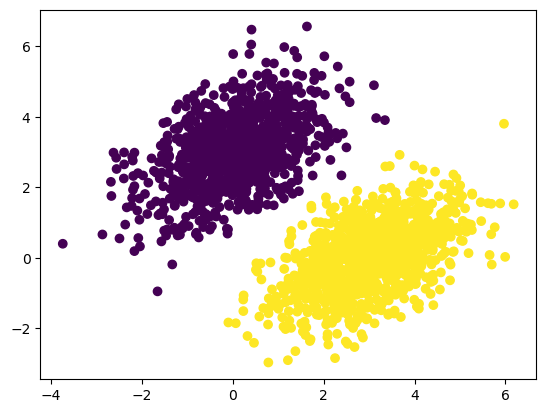

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(inputs[:, 0], inputs[:, 1], c=target[:, 0])
plt.show()

### Create a linear classifier 
This will be created using tensflow operators and tensors. prediction = W * input + b 

In [6]:
input_dim = 2 
output_dim = 1 

W = tf.Variable(tf.random.uniform((input_dim, output_dim)))
b = tf.Variable(tf.zeros(output_dim))

In [7]:
# now we define the neural network 
def model(inputs):
  return tf.matmul(inputs, W) + b  

# not the loss function error 
def square_loss(targets, predictions):
  per_sample_loss = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_loss) # averaging the loss over all samples

# training step
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])  # compute the derivative of the loss with respect to W and b
    W.assign_sub(grad_loss_wrt_W * learning_rate)  # W = W - grad_loss_wrt_W * learning_rate
    b.assign_sub(grad_loss_wrt_b * learning_rate)  # b = b - grad_loss_wrt_b * learning_rate 

    return loss

In [ ]:
# Next step is to train the model with batches of data. 
